#Desafio Cientista de Dados

Você foi alocado em um time da Indicium contratado por um estúdio de Hollywood chamado PProductions, e agora deve fazer uma análise em cima de um banco de dados cinematográfico para orientar qual tipo de filme deve ser o próximo a ser desenvolvido. Lembre-se que há muito dinheiro envolvido, então a análise deve ser muito detalhada e levar em consideração o máximo de fatores possíveis (a introdução de dados externos é permitida - e encorajada).

1.	Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses relacionadas. Seja criativo!

###Leitura dos dados

Para começar o projeto iniciamos importando as bibliotecas necessárias, assim como realizar o carregamento do csv e leitura do mesmo.

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('desafio_indicium_imdb.csv')


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [3]:
df.head(5)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [5]:
df.isnull().sum()

,0
Unnamed: 0,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


Esse dataset é composto por 999 linhas e 16 colunas, sendo uma "oculta" correspondendo ao id de cada linha, sendo 12 do tipo objeto, 2 como int64 e 2 float64. Temos valores nulos nas colunas Gross, Meta_score e Certificate.

###Tratamento dos Dados

Vamos realizar o tratamento de algumas colunas, iniciando com a coluna "Gross" que é removido a vírgula e converter a coluna para float. Posteriormente convertemos a coluna "Runtime" para númerico e removemos a string min para poder focar nos valores númericos dessa coluna. Finalizando com as colunas "Meta_score" e "Released_Year" ambas são convertidas para númerico.

In [6]:
# Remover vírgulas e converter a coluna 'Gross' para float
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

In [7]:
# Converter a coluna 'Runtime' para numérico, removendo ' min'
df['Runtime'] = df['Runtime'].str.replace(' min', '')
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')

In [8]:
# Converter a coluna 'Meta_score' para numérico
df['Meta_score'] = pd.to_numeric(df['Meta_score'], errors='coerce')

In [13]:
# Converter a coluna 'Released_Year' para numérico
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

In [11]:
# Renomear a coluna Unnamed para Id
df = df.rename(columns={"Unnamed: 0": "Id"})

Posteriormente foi realizado o tratamento de valores ausentes das colunas "Gross", "Meta_score", "Runtime", por serem valores númericos é calculada a média e incluído nos valores ausentes. Já a coluna "Certificate" não é possível aplicar o mesmo tratamento, dessa forma é removida as linhas com valores ausentes.

In [15]:
# Tratar valores ausentes
df['Gross'] = df['Gross'].fillna(df['Gross'].median())
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].median())
df['Runtime'] = df['Runtime'].fillna(df['Runtime'].median())

In [16]:
# Remover as linhas com valores ausentes
dados_tratados = df.dropna(subset=['Certificate'])

Após realizar os tratamentos o dataset é ficou com 898 linhas e 16 colunas, sendo 9 do tipo objeto, 3 como int64 e 4 float64.

In [17]:
# Estatísticas descritivas
dados_tratados.describe()

,Id,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,898.000000,897.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02
mean,498.700445,1992.983278,124.187082,7.949777,77.737194,2.954914e+05,6.571775e+07
std,293.011318,21.836056,28.357618,0.278523,11.524197,3.298327e+05,1.056994e+08
min,1.000000,1921.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,239.250000,1980.000000,104.000000,7.700000,72.000000,6.415900e+04,5.573758e+06
50%,503.500000,1999.000000,120.000000,7.900000,79.000000,1.659370e+05,2.345744e+07
75%,756.750000,2010.000000,138.000000,8.100000,85.000000,4.194672e+05,7.498700e+07
max,997.000000,2020.000000,321.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


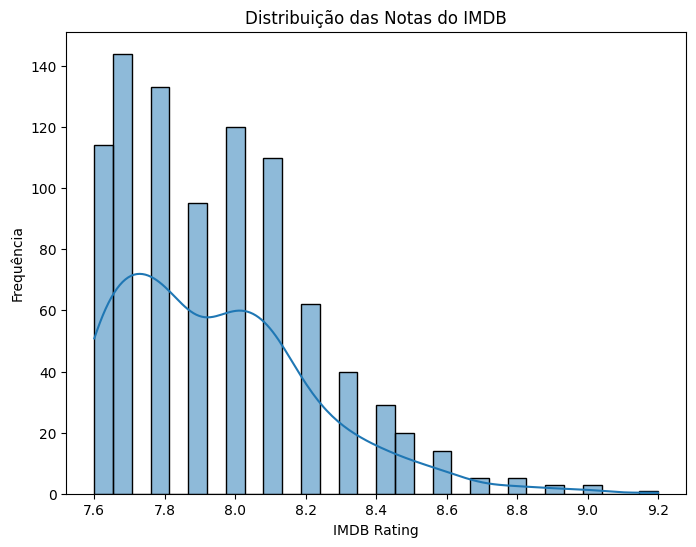

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(dados_tratados['IMDB_Rating'], kde=True, bins=30)
plt.title('Distribuição das Notas do IMDB')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequência')
plt.show()

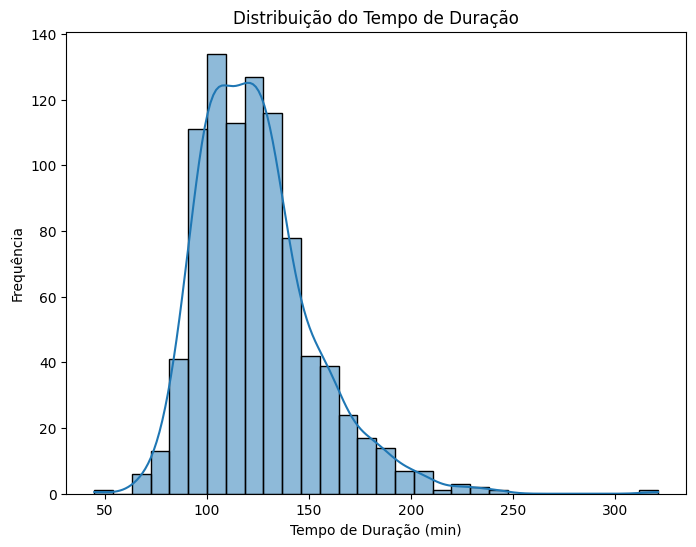

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(dados_tratados['Runtime'], kde=True, bins=30)
plt.title('Distribuição do Tempo de Duração')
plt.xlabel('Tempo de Duração (min)')
plt.ylabel('Frequência')
plt.show()


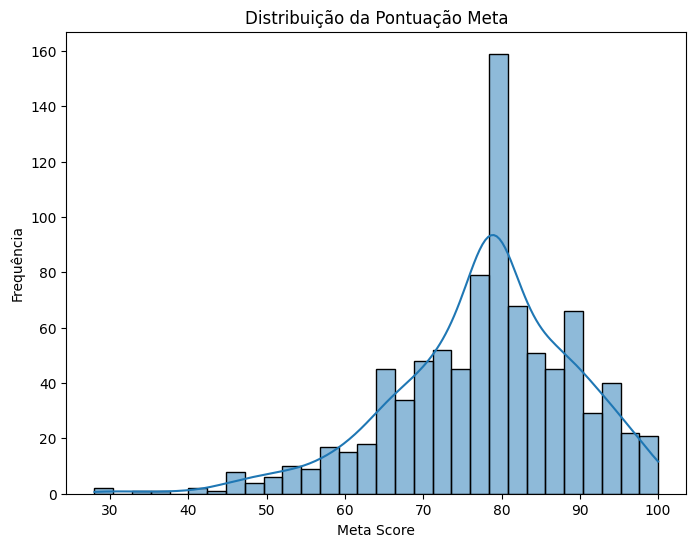

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(dados_tratados['Meta_score'], kde=True, bins=30)
plt.title('Distribuição da Pontuação Meta')
plt.xlabel('Meta Score')
plt.ylabel('Frequência')
plt.show()

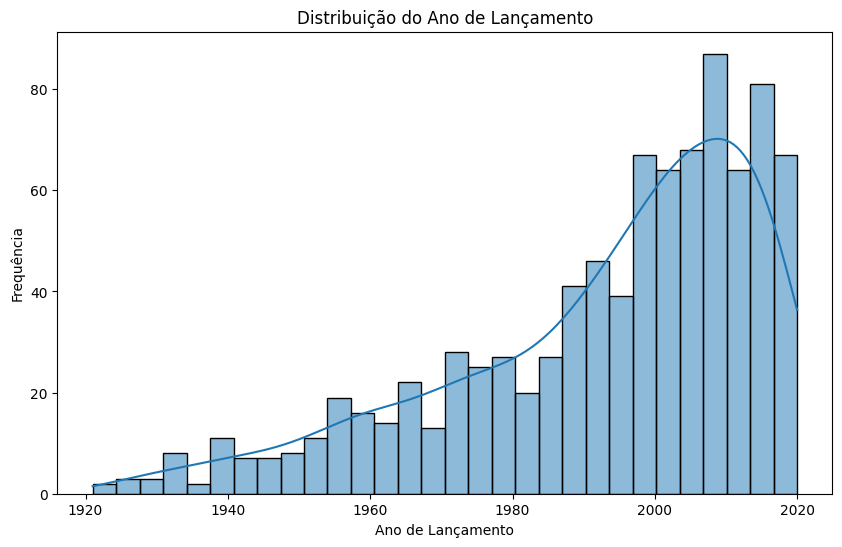

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(dados_tratados['Released_Year'], kde=True, bins=30)
plt.title('Distribuição do Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Frequência')
plt.show()

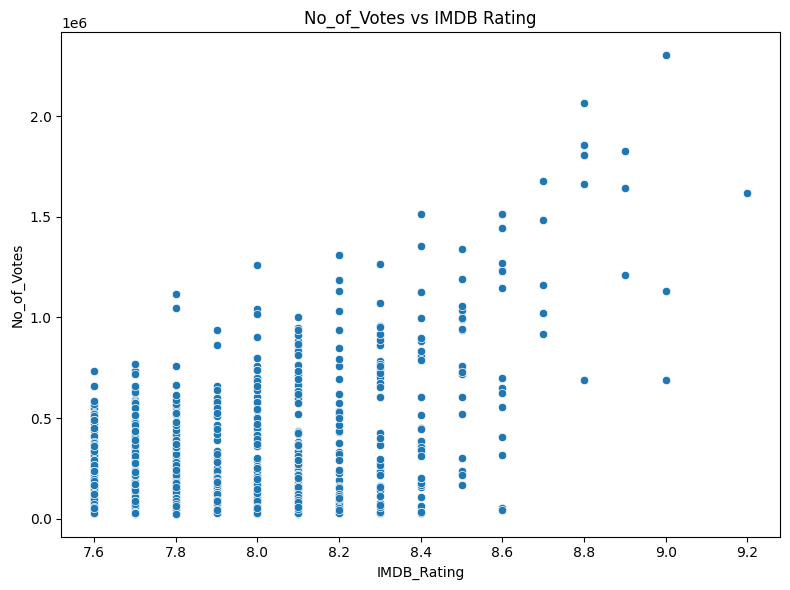

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='IMDB_Rating', y='No_of_Votes')
plt.title("No_of_Votes vs IMDB Rating")
plt.tight_layout()
plt.show()

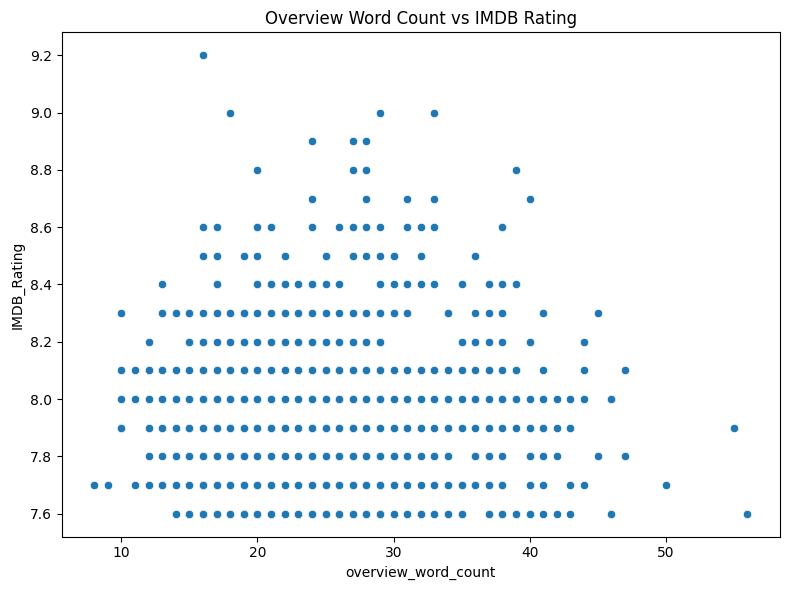

In [24]:
# --- Relação Overview word count vs Rating ---
df['overview_word_count'] = df['Overview'].astype(str).apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='overview_word_count', y='IMDB_Rating')
plt.title("Overview Word Count vs IMDB Rating")
plt.tight_layout()
plt.show()

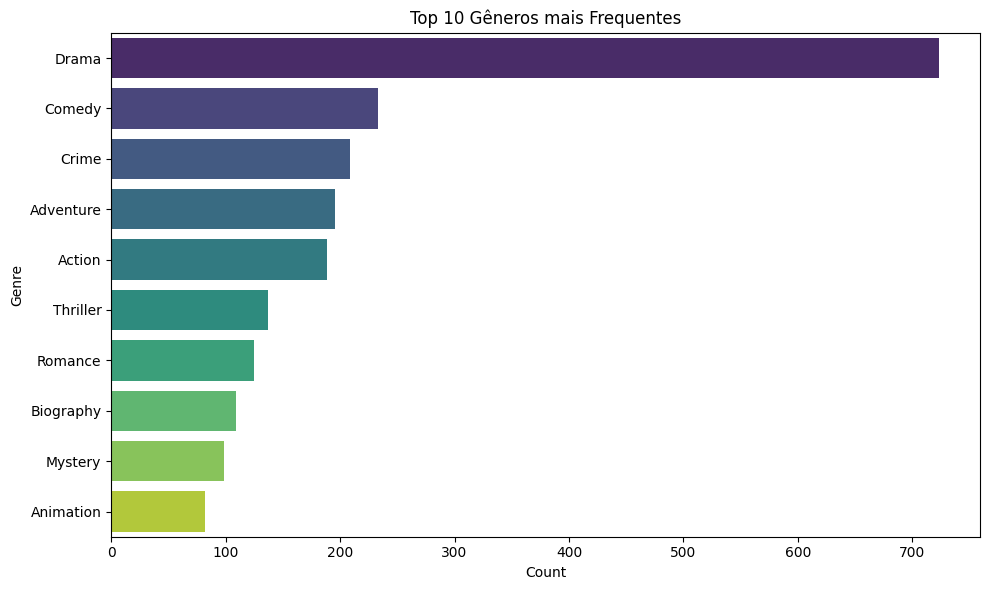

In [26]:
genres_all = []
for row in df['Genre'].dropna():
    genres_all.extend([g.strip() for g in row.split(',')])
genre_counts = Counter(genres_all)
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot( data=top_genres, x='Count', y='Genre', hue='Genre', palette='viridis', legend=False)
plt.title("Top 10 Gêneros mais Frequentes")
plt.tight_layout()
plt.show()


 Hipóteses levantadas:

 1. Filmes com mais votos tendem a ter maior reconhecimento e possivelmente maior bilheteria.

 2. Filmes com notas altas de críticos (Meta_score) também tendem a ter notas altas no IMDB.

 3. Drama e Ação são gêneros dominantes; Drama tem maior presença no topo do ranking.

 4. Descrições mais longas podem estar associadas a filmes com maior marketing/complexidade narrativa.

 5. Certificados (A, U, UA etc.) podem influenciar bilheteria.

 6. A década de lançamento influencia padrão de notas e bilheteria: clássicos antigos têm notas altas mesmo com bilheteria menor.

2.Responda também às seguintes perguntas:

a) Qual filme você recomendaria para uma pessoa que você não conhece?

In [30]:
df_sorted = df.sort_values(
    by=['IMDB_Rating', 'Meta_score', 'No_of_Votes'],
    ascending=[False, False, False]
)
recommended_movie = df_sorted.iloc[0]
print("Filme recomendado para uma pessoa desconhecida:")
print(f"{recommended_movie['Series_Title']} ({recommended_movie['Released_Year']})")
print(f"IMDB Rating: {recommended_movie['IMDB_Rating']}, Meta_score: {recommended_movie['Meta_score']}")

Filme recomendado para uma pessoa desconhecida:
The Godfather (1972.0)
IMDB Rating: 9.2, Meta_score: 100.0


b) Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

In [32]:
numeric_cols = ['IMDB_Rating', 'Meta_score', 'No_of_Votes']
corr = df[numeric_cols + ['Gross']].corr()['Gross'].sort_values(ascending=False)
print("Correlação da bilheteria (Gross) com outras variáveis numéricas:")
print(corr)
print()

# Top gêneros por bilheteria média
genres_all = []
for idx, row in df.iterrows():
    if pd.notna(row['Genre']):
        genres = [g.strip() for g in row['Genre'].split(',')]
        for g in genres:
            genres_all.append((g, row['Gross']))

genres_df = pd.DataFrame(genres_all, columns=['Genre', 'Gross'])
avg_gross_by_genre = genres_df.groupby('Genre')['Gross'].mean().sort_values(ascending=False)
print("Gêneros com maior bilheteria média:")
print(avg_gross_by_genre.head(5))
print()

Correlação da bilheteria (Gross) com outras variáveis numéricas:
Gross          1.000000
No_of_Votes    0.602705
IMDB_Rating    0.088139
Meta_score    -0.051865
Name: Gross, dtype: float64

Gêneros com maior bilheteria média:
Genre
Adventure    1.468582e+08
Sci-Fi       1.368710e+08
Action       1.206742e+08
Animation    1.088498e+08
Fantasy      9.571390e+07
Name: Gross, dtype: float64



c. Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

In [41]:
# Criar uma nova coluna de contagem de palavras
df['overview_word_count'] = df['Overview'].astype(str).apply(lambda x: len(x.split()))

# Exibir média de palavras por gênero
overview_data = []
for idx, row in df.iterrows():
    if pd.notna(row['Genre']):
        genres = [g.strip() for g in row['Genre'].split(',')]
        for g in genres:
            overview_data.append((g, row['overview_word_count']))

overview_df = pd.DataFrame(overview_data, columns=['Genre', 'WordCount'])
avg_wc_by_genre = overview_df.groupby('Genre')['WordCount'].mean().sort_values(ascending=False)
print("Média de palavras no Overview por gênero:")
print(avg_wc_by_genre.head(5))
print()

# Demonstração de TF-IDF (vetorização de texto do Overview)
tfidf = TfidfVectorizer(stop_words='english', max_features=10)
tfidf_matrix = tfidf.fit_transform(df['Overview'].astype(str).fillna(''))
print("Principais palavras identificadas pelo TF-IDF (para classificação futura):")
print(tfidf.get_feature_names_out())


Média de palavras no Overview por gênero:
Genre
Adventure    27.265306
Animation    26.817073
Action       26.645503
Sci-Fi       26.164179
Fantasy      26.090909
Name: WordCount, dtype: float64

Principais palavras identificadas pelo TF-IDF (para classificação futura):
['family' 'life' 'love' 'man' 'new' 'story' 'war' 'woman' 'world' 'young']


Podemos concluir dessa forma que é possível usar TF-IDF ou embeddings para treinar um modelo de classificação de gênero baseado no Overview.

3. Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import joblib


# Limpeza de dados
df['Gross'] = df['Gross'].replace('[\$,]', '', regex=True).replace('', np.nan).astype(float)
df['Runtime'] = df['Runtime'].str.replace(' min', '', regex=False).astype(float)

# Seleção de variáveis
X = df[['Genre', 'Certificate', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime', 'Overview']]
y = df['IMDB_Rating']

# Transformações
categorical_cols = ['Genre', 'Certificate']
numeric_cols = ['Meta_score', 'No_of_Votes', 'Gross', 'Runtime']
text_col = 'Overview'

# Pipelines de transformação
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

text_transformer = TfidfVectorizer(max_features=100)

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numeric_transformer, numeric_cols),
        ('text', text_transformer, text_col)
    ]
)

# Modelo
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Treinamento
pipeline.fit(X_train, y_train)

# Avaliação
y_pred = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

# Salvar modelo
joblib.dump(pipeline, "imdb_model.pkl")
print("Modelo salvo como imdb_model.pkl")


<>:13: SyntaxWarning: invalid escape sequence '\$'
<>:13: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-1619516564.py:13: SyntaxWarning: invalid escape sequence '\$'
  df['Gross'] = df['Gross'].replace('[\$,]', '', regex=True).replace('', np.nan).astype(float)


RMSE: 0.212
R²: 0.313
Modelo salvo como imdb_model.pkl


4. Supondo um filme com as seguintes características:

{'Series_Title': 'The Shawshank Redemption',

 'Released_Year': '1994',

 'Certificate': 'A',

 'Runtime': '142 min',

 'Genre': 'Drama',

 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',

 'Meta_score': 80.0,

 'Director': 'Frank Darabont',

 'Star1': 'Tim Robbins',

 'Star2': 'Morgan Freeman',

 'Star3': 'Bob Gunton',

 'Star4': 'William Sadler',

 'No_of_Votes': 2343110,

 'Gross': '28,341,469'}


Qual seria a nota do IMDB?


In [40]:
import joblib

# Carregar modelo salvo
pipeline = joblib.load("imdb_model.pkl")

# Criar DataFrame com dados do filme
filme = {
    'Series_Title': ['The Shawshank Redemption'],
    'Released_Year': ['1994'],
    'Certificate': ['A'],
    'Runtime': ['142 min'],
    'Genre': ['Drama'],
    'Overview': ['Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.'],
    'Meta_score': [80.0],
    'Director': ['Frank Darabont'],
    'Star1': ['Tim Robbins'],
    'Star2': ['Morgan Freeman'],
    'Star3': ['Bob Gunton'],
    'Star4': ['William Sadler'],
    'No_of_Votes': [2343110],
    'Gross': ['28,341,469']
}

filme_df = pd.DataFrame(filme)

# Converter Gross e Runtime
filme_df['Gross'] = filme_df['Gross'].replace('[\$,]', '', regex=True).astype(float)
filme_df['Runtime'] = filme_df['Runtime'].str.replace(' min', '', regex=False).astype(float)

# Selecionar colunas usadas no modelo
X_novo = filme_df[['Genre', 'Certificate', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime', 'Overview']]

# Fazer a previsão
nota_prevista = pipeline.predict(X_novo)
print(f"🎬 Nota IMDb prevista: {nota_prevista[0]:.2f}")


🎬 Nota IMDb prevista: 8.75


<>:27: SyntaxWarning: invalid escape sequence '\$'
<>:27: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-1355183825.py:27: SyntaxWarning: invalid escape sequence '\$'
  filme_df['Gross'] = filme_df['Gross'].replace('[\$,]', '', regex=True).astype(float)
